In [29]:
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns

In [35]:
gcparks = pd.read_excel('GCPARKS.xlsx')
attendance = pd.read_excel('Attendance.xlsx')

In [9]:
pd.set_option('display.max_columns', None) 
gcparks

,Date of Incident/Loss,Fiscal Year,Fiscal Month,Time of Incident/Loss,Occurrence Number,Claim Number,Age at Date of Incident,Adjuster Name Name,Major Coverage,Major Coverage Desc,Coverage,Coverage Desc,Claim Status,Claim Status Code,Claim or Incident?,Business Area Desc,Personnel Area Desc,Division Desc,Building Desc,Department Desc,Location At Level 5 Desc,Location Code Desc,Line of Business Desc,Sub Location,Sub Location Desc,Incident Description,Injury Description,Other Description,Source of Incident Desc,Event of Incident Desc,Source of Injury Desc,Event of Injury Desc,EDI Body Part Desc,Body Part 1 Desc,Body Part 1 Group,Body Part 2 Desc,Body Part 2 Group,Body Part 3 Desc,Body Part 3 Group,Body Part 4 Desc,Body Part 4 Group,Body Part 5 Desc,Body Part 5 Group,Body Part Group (Overall),Nature of Injury 1 Desc,Nature of Injury 2 Desc,Nature of Injury 3 Desc,Nature of Injury 4 Desc,Nature of Injury 5 Desc,Treatment Code (IAAPA) Desc,Severity,Litigation Desc,Attorney Represented,Attorney Represented Desc,Service Co. TPA Code/Carrier Code,Service Co. TPA Code/Carrier Code Name,DVC/Fireman's Fund Flag,DVC/Fireman's Fund Flag Desc,Disney Claim Total Incurred,Disney Claim Total Paid,Disney Claim Total Reserve
0,2017-10-01,FY18,1_Oct,805.0,WDWG2017155220,WDWG2017155220,2016,NaN,20.0,General Liability,22,General Liability - Bodily Injury,INCIDENT,I,Incident,NaN,2227 - ANIMAL KINGDOM 1029 - FL,Disney's Animal Kingdom Theme Park,Disney KiteTails at Discovery River Theater,NaN,NaN,Disney KiteTails at Discovery River Theater,Attraction,UNK,Unknown,Guest's parents stated they were waiting at Ri...,Right side of the back of the lead had about a...,NaN,Walking Surface - Outdoor,Slip/Trip/Misstep - Trip,Walking Surface - Outdoor,Struck/Struck By,NaN,Back of Head,Head/Neck,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Head/Neck,Unknown,NaN,NaN,NaN,NaN,4 First Aid Only,First Aid Only,NaN,NaN,NaN,SELF,Self-administered,NaN,NaN,NaN,NaN,NaN
1,2017-10-01,FY18,1_Oct,840.0,WDWG2017155214,WDWG2017155214,2016,NaN,20.0,General Liability,22,General Liability - Bodily Injury,INCIDENT,I,Incident,NaN,2227 - ANIMAL KINGDOM 1029 - FL,Disney's Animal Kingdom Theme Park,Main Entrance - Animal Kingdom Park,NaN,NaN,Main Entrance - Animal Kingdom Park,Themed Area,WALKS,Walkways,Guest states that he tripped coming into park ...,Guest states that he tripped coming into park ...,NaN,Walking Surface - Outdoor,Slip/Trip/Misstep - Trip,Walking Surface - Outdoor,Struck/Struck By,NaN,Finger(s),Arm/Hand,Elbow,Arm/Hand,NaN,NaN,NaN,NaN,NaN,NaN,Arm/Hand,Abrasion/Cut/Puncture,Abrasion/Cut/Puncture,NaN,NaN,NaN,4 First Aid Only,First Aid Only,NaN,NaN,NaN,SELF,Self-administered,NaN,NaN,NaN,NaN,NaN
2,2017-10-01,FY18,1_Oct,945.0,WDWG2017155117,WDWG2017155117,29,NaN,20.0,General Liability,22,General Liability - Bodily Injury,INCIDENT,I,Incident,NaN,2092 - MAGIC KINGDOM 1029 - FL,Magic Kingdom Park,Fantasyland,Castle Courtyard,Prince Charming Regal Carrousel,Prince Charming Regal Carrousel,Attraction,RIDE,On Ride,Guest was on Prince Charming Regal Carrousel a...,Guest passed out,NaN,Attraction Related - Park Vehicle - Attraction...,On Ride - Ride Motion,Attraction Related - Park Vehicle - Attraction...,On Ride - Ride Motion,NaN,General Body,General,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,General,Loss of Consciousness,NaN,NaN,NaN,NaN,4 First Aid Only,First Aid Only,NaN,NaN,NaN,SELF,Self-administered,NaN,NaN,NaN,NaN,NaN
3,2017-10-01,FY18,1_Oct,1000.0,WDWG2017155079,WDWG2017155079,26,NaN,20.0,General Liability,22,General Liability - Bodily Injury,INCIDENT,I,Incident,NaN,2092 - MAGIC KINGDOM 1029 - FL,Magic Kingdom Park,NaN,NaN,NaN,Magic Kingdom Park,Park Overall,UNK,Unknown,"guest states "" I am not feeling well. I feel ...","guest states "" I am not feeling well. I feel ...",NaN,Person - Self,Fatigue / Illness,Person - Self,Fatigue / Illness,NaN,Chest,Torso,Lungs,Torso,NaN,NaN,NaN,NaN,NaN,NaN,Torso,Pain/Discomfort,Respiratory Distress/Shortness of Breath,NaN,NaN,NaN,4 First Aid Only,First Aid Only,NaN,NaN

In [7]:
gcparks = gcparks.drop('Setid', axis =1)
gcparks = gcparks.drop('Client ID-Claim', axis =1)
gcparks = gcparks.drop('Incident to Claim Date', axis =1)
gcparks = gcparks.drop('Coverage', axis =1)
gcparks = gcparks.drop('Claim Status Code', axis =1)
gcparks = gcparks.drop('Coverage', axis =1)

In [18]:
grouped = gcparks.groupby('Personnel Area Desc')

dfs = {}

for division, subset in grouped:
    dfs[division] = subset

In [19]:
for division_name in dfs.keys():
    print(division_name)

0569 - EPCOT - FL
0663 - Disney's Hollywood Studios - FL
2092 - MAGIC KINGDOM 1029 - FL
2227 - ANIMAL KINGDOM 1029 - FL


In [25]:
ecdf = dfs['0569 - EPCOT - FL']
hsdf = dfs['0663 - Disney\'s Hollywood Studios - FL']
mkdf = dfs['2092 - MAGIC KINGDOM 1029 - FL']
akdf = dfs['2227 - ANIMAL KINGDOM 1029 - FL']

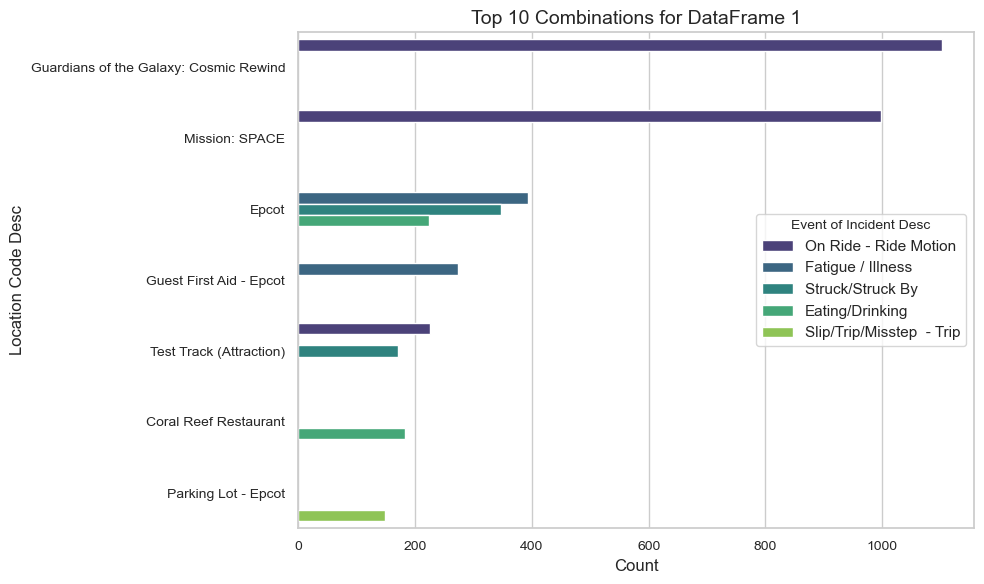

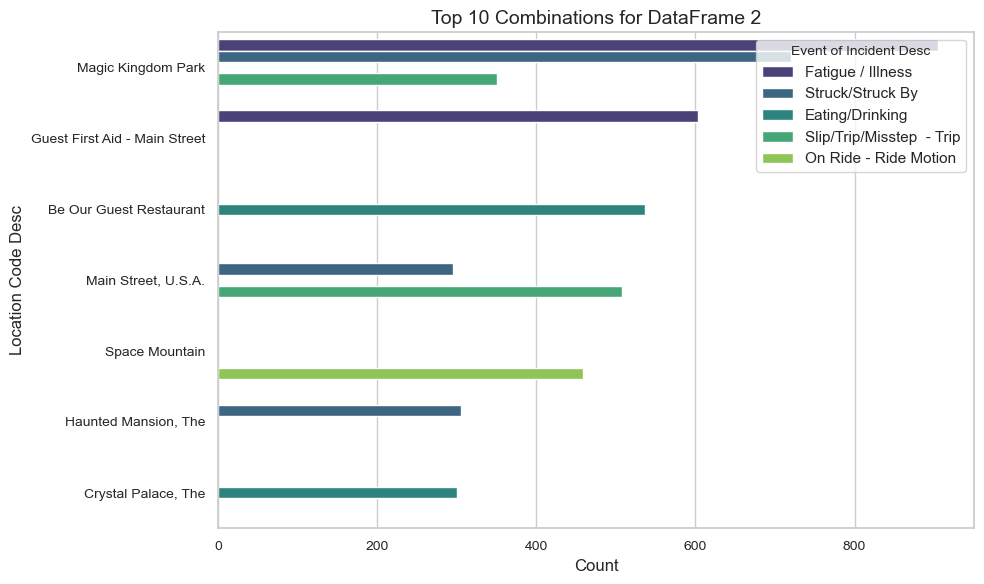

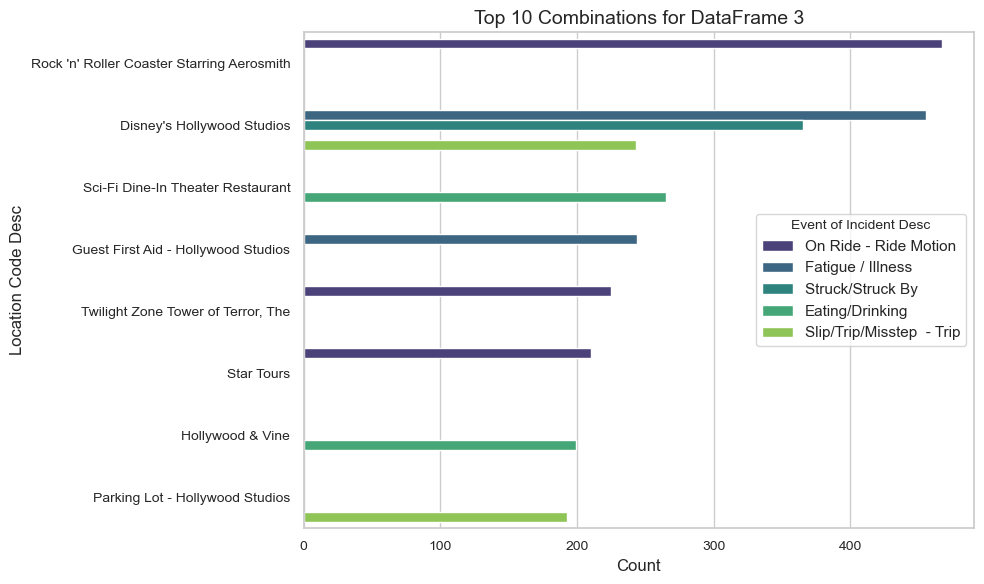

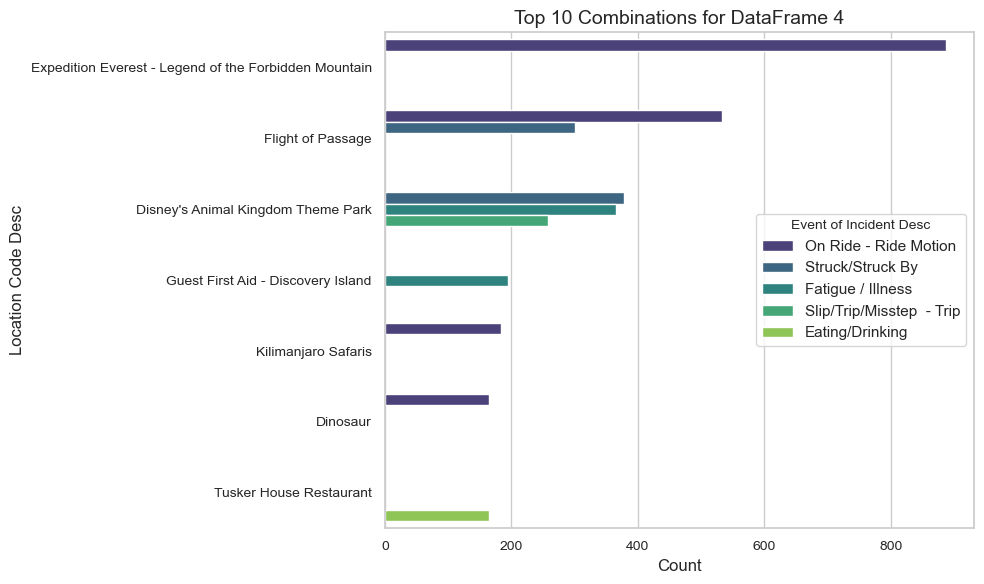

In [33]:
#VISUALIZATIONS FOR MOST COMMON COMBINATIONS

dataframes = [ecdf, mkdf, hsdf, akdf]

top_combinations = {}

# Calculating the top 10 combinations for each Location Desc and Event of Incident Desc
for i, dataframe in enumerate(dataframes):
    top_combinations[f"DataFrame {i + 1}"] = dataframe.groupby(['Location Code Desc', 'Event of Incident Desc']).size().reset_index(name='Count').nlargest(10, 'Count')

sns.set(style="whitegrid")

for dataframe_name, top_combos in top_combinations.items():
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Count', y='Location Code Desc', hue='Event of Incident Desc', data=top_combos, palette="viridis")
    plt.title(f"Top 10 Combinations for {dataframe_name}", fontsize=14)
    plt.xlabel("Count", fontsize=12)
    plt.ylabel("Location Code Desc", fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(title="Event of Incident Desc", title_fontsize=10)
    plt.tight_layout()
    plt.show()

In [34]:
# ALL COMBONIATIONS

for i, dataframe in enumerate(dataframes):
    print(f"Table for DataFrame {i + 1}:")
    table = dataframe.groupby(['Location Code Desc', 'Event of Incident Desc']).size().reset_index(name='Count')
    print(table)
    print("\n")

Table for DataFrame 1:
              Location Code Desc              Event of Incident Desc  Count
0          Advanced Training Lab                         Body Motion      2
1          Advanced Training Lab               Body Motion - Jumping      1
2          Advanced Training Lab             Caught In/Under/Between      1
3          Advanced Training Lab         Fall/Jump out/off of - Fall      1
4          Advanced Training Lab                   Slip/Trip/Misstep      2
...                          ...                                 ...    ...
2409  Yorkshire County Fish Shop  Property Damage Broken/Torn/Soiled      1
2410  Yorkshire County Fish Shop        Slip/Trip/Misstep  - Misstep      4
2411  Yorkshire County Fish Shop           Slip/Trip/Misstep  - Slip      1
2412  Yorkshire County Fish Shop           Slip/Trip/Misstep  - Trip      8
2413  Yorkshire County Fish Shop                    Struck/Struck By      6

[2414 rows x 3 columns]


Table for DataFrame 2:
            Loc

In [38]:
#HIGHEST LOCATION/EVENT INCURRED

for i, dataframe in enumerate(dataframes):
    top_combinations[f"DataFrame {i + 1}"] = dataframe.groupby(['Location Code Desc', 'Event of Incident Desc'])[['Disney Claim Total Incurred']].sum().nlargest(10, 'Disney Claim Total Incurred')

# Print the top 10 combinations and their total incurred for each DataFrame
for dataframe_name, top_combos in top_combinations.items():
    print(f"Top 10 Combinations with Total Incurred for {dataframe_name}:")
    print(top_combos)
    print("\n")

Top 10 Combinations with Total Incurred for DataFrame 1:
                                                                                 Disney Claim Total Incurred
Location Code Desc                                 Event of Incident Desc                                   
France                                             Body Motion                                     713607.05
Guardians of the Galaxy: Cosmic Rewind             Slip/Trip/Misstep  - Misstep                    615350.00
Parking Lot - Epcot                                Slip/Trip/Misstep  - Trip                       480552.92
Beauty and the Beast Sing-Along - Impressions d... Body Motion                                     370867.47
Seas with Nemo & Friends, The                      Slip/Trip/Misstep  - Slip                       252500.00
Guardians of the Galaxy: Cosmic Rewind             Slip/Trip/Misstep  - Trip                       226000.00
Mexico                                             Slip/Trip/Misstep  -

In [40]:
#HIGHEST INCURRED WITH NUMBER OF CLAIMS

for i, dataframe in enumerate(dataframes):
    top_combinations[f"DataFrame {i + 1}"] = dataframe.groupby(['Location Code Desc', 'Event of Incident Desc'])[['Disney Claim Total Incurred', 'Claim Number']].agg({'Disney Claim Total Incurred': 'sum', 'Claim Number': 'nunique'}).nlargest(10, 'Disney Claim Total Incurred')

for dataframe_name, top_combos in top_combinations.items():
    print(f"Top 10 Combinations with Total Incurred and Unique Claim Numbers for {dataframe_name}:")
    print(top_combos)
    print("\n")

Top 10 Combinations with Total Incurred and Unique Claim Numbers for DataFrame 1:
                                                                                 Disney Claim Total Incurred  \
Location Code Desc                                 Event of Incident Desc                                      
France                                             Body Motion                                     713607.05   
Guardians of the Galaxy: Cosmic Rewind             Slip/Trip/Misstep  - Misstep                    615350.00   
Parking Lot - Epcot                                Slip/Trip/Misstep  - Trip                       480552.92   
Beauty and the Beast Sing-Along - Impressions d... Body Motion                                     370867.47   
Seas with Nemo & Friends, The                      Slip/Trip/Misstep  - Slip                       252500.00   
Guardians of the Galaxy: Cosmic Rewind             Slip/Trip/Misstep  - Trip                       226000.00   
Mexico                

In [42]:
#TOP 10 MOST COMMON LOCATION/EVENT PER PARK

for i, dataframe in enumerate(dataframes):
    top_combinations[f"DataFrame {i + 1}"] = dataframe.groupby(['Location Code Desc', 'Event of Incident Desc'])[['Claim Number']].nunique().nlargest(10, 'Claim Number')

# Print the top 10 combinations and their sum of Claim Numbers for each DataFrame
for dataframe_name, top_combos in top_combinations.items():
    print(f"Top 10 Location Event Combos based on Sum of Claim Numbers for {dataframe_name}:")
    print(top_combos)
    print("\n")

Top 10 Location Event Combos based on Sum of Claim Numbers for DataFrame 1:
                                                                  Claim Number
Location Code Desc                     Event of Incident Desc                 
Guardians of the Galaxy: Cosmic Rewind On Ride - Ride Motion              1102
Mission: SPACE                         On Ride - Ride Motion               997
Epcot                                  Fatigue / Illness                   393
                                       Struck/Struck By                    347
Guest First Aid - Epcot                Fatigue / Illness                   273
Test Track (Attraction)                On Ride - Ride Motion               225
Epcot                                  Eating/Drinking                     223
Coral Reef Restaurant                  Eating/Drinking                     182
Test Track (Attraction)                Struck/Struck By                    170
Parking Lot - Epcot                    Slip/Trip/Misste

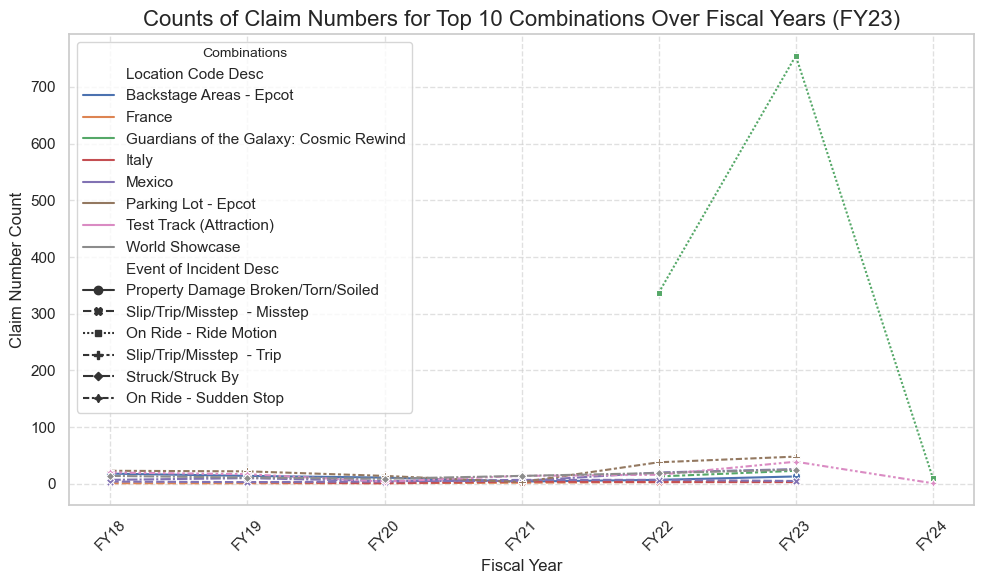

In [61]:
#FISCAL YEAR BREAKDOWN
df = ecdf
fy23_data = df[df['Fiscal Year'] == 'FY23']

# Find the top 10 combinations based on incurred total for FY23
top_10_combinations = fy23_data.groupby(['Location Code Desc', 'Event of Incident Desc'])['Disney Claim Total Incurred'].sum().nlargest(10).index

# Calculate the counts of claim numbers for the top 10 combinations per fiscal year
counts_per_fiscal_year = df[df.set_index(['Location Code Desc', 'Event of Incident Desc']).index.isin(top_10_combinations)]
counts_per_fiscal_year = counts_per_fiscal_year.groupby(['Location Code Desc', 'Event of Incident Desc', 'Fiscal Year'])['Claim Number'].nunique().reset_index(name='Claim Number Count')

# Visualize the counts per fiscal year
plt.figure(figsize=(10, 6))
sns.lineplot(x='Fiscal Year', y='Claim Number Count', data=counts_per_fiscal_year, hue='Location Code Desc', style='Event of Incident Desc', markers=True)
plt.title("Counts of Claim Numbers for Top 10 Combinations Over Fiscal Years (FY23)", fontsize=16)
plt.xlabel("Fiscal Year", fontsize=12)
plt.ylabel("Claim Number Count", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Combinations", title_fontsize=10, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.tight_layout()
plt.show()

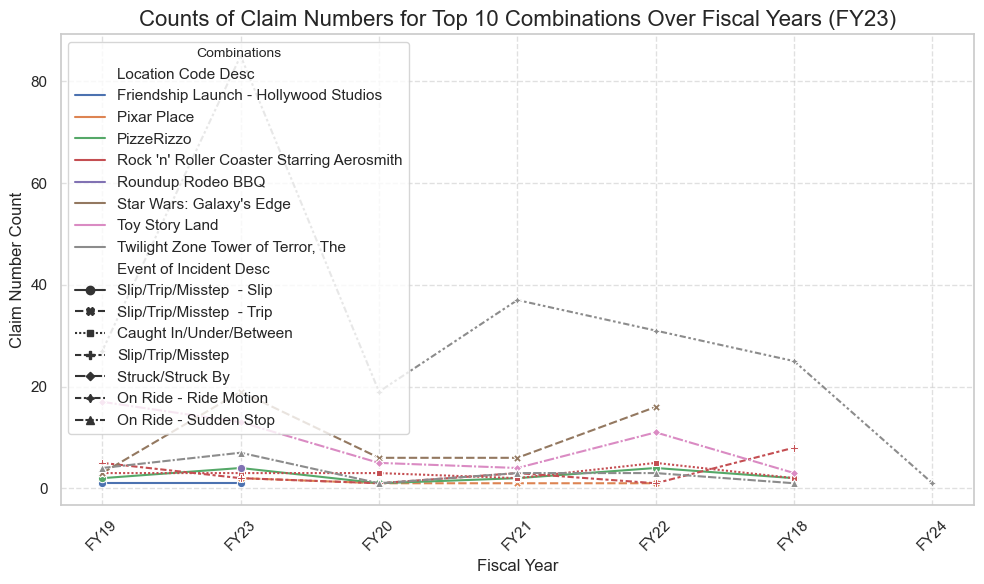

In [71]:
df = hsdf
fy23_data = df[df['Fiscal Year'] == 'FY23']

# Find the top 10 combinations based on incurred total for FY23
top_10_combinations = fy23_data.groupby(['Location Code Desc', 'Event of Incident Desc'])['Disney Claim Total Incurred'].sum().nlargest(10).index

# Calculate the counts of claim numbers for the top 10 combinations per fiscal year
counts_per_fiscal_year = df[df.set_index(['Location Code Desc', 'Event of Incident Desc']).index.isin(top_10_combinations)]
counts_per_fiscal_year = counts_per_fiscal_year.groupby(['Location Code Desc', 'Event of Incident Desc', 'Fiscal Year'])['Claim Number'].nunique().reset_index(name='Claim Number Count')

# Visualize the counts per fiscal year
plt.figure(figsize=(10, 6))
sns.lineplot(x='Fiscal Year', y='Claim Number Count', data=counts_per_fiscal_year, hue='Location Code Desc', style='Event of Incident Desc', markers=True)
plt.title("Counts of Claim Numbers for Top 10 Combinations Over Fiscal Years (FY23)", fontsize=16)
plt.xlabel("Fiscal Year", fontsize=12)
plt.ylabel("Claim Number Count", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Combinations", title_fontsize=10, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.tight_layout()
plt.show()

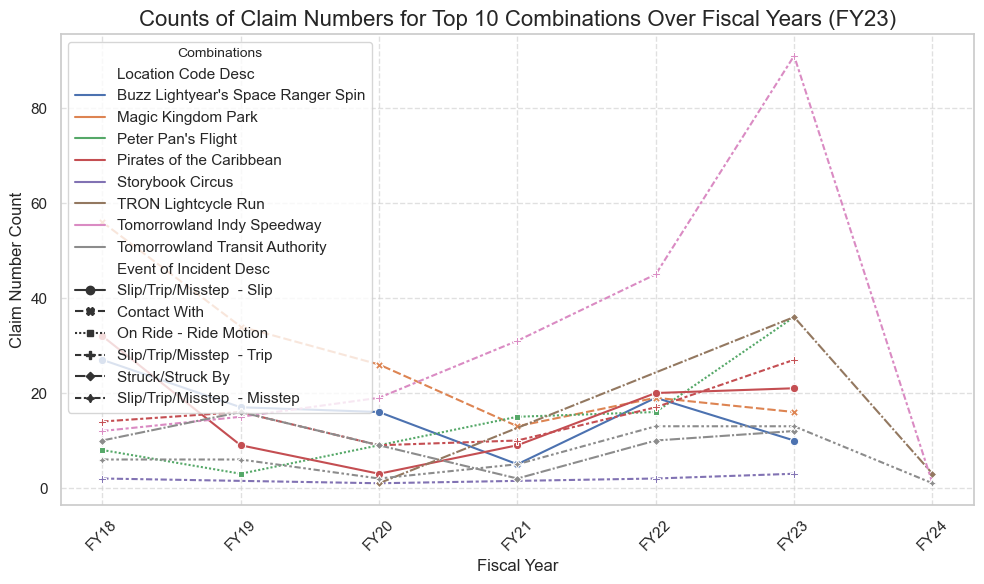

In [64]:
df = mkdf
fy23_data = df[df['Fiscal Year'] == 'FY23']

# Find the top 10 combinations based on incurred total for FY23
top_10_combinations = fy23_data.groupby(['Location Code Desc', 'Event of Incident Desc'])['Disney Claim Total Incurred'].sum().nlargest(10).index

# Calculate the counts of claim numbers for the top 10 combinations per fiscal year
counts_per_fiscal_year = df[df.set_index(['Location Code Desc', 'Event of Incident Desc']).index.isin(top_10_combinations)]
counts_per_fiscal_year = counts_per_fiscal_year.groupby(['Location Code Desc', 'Event of Incident Desc', 'Fiscal Year'])['Claim Number'].nunique().reset_index(name='Claim Number Count')

# Visualize the counts per fiscal year
plt.figure(figsize=(10, 6))
sns.lineplot(x='Fiscal Year', y='Claim Number Count', data=counts_per_fiscal_year, hue='Location Code Desc', style='Event of Incident Desc', markers=True)
plt.title("Counts of Claim Numbers for Top 10 Combinations Over Fiscal Years (FY23)", fontsize=16)
plt.xlabel("Fiscal Year", fontsize=12)
plt.ylabel("Claim Number Count", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Combinations", title_fontsize=10, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.tight_layout()
plt.show()

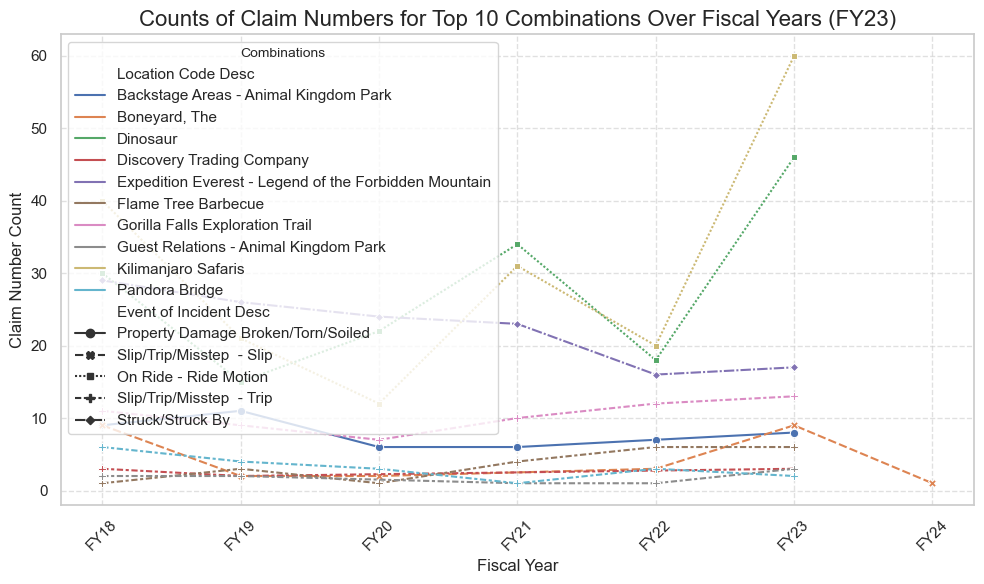

In [65]:
df = akdf
fy23_data = df[df['Fiscal Year'] == 'FY23']

# Find the top 10 combinations based on incurred total for FY23
top_10_combinations = fy23_data.groupby(['Location Code Desc', 'Event of Incident Desc'])['Disney Claim Total Incurred'].sum().nlargest(10).index

# Calculate the counts of claim numbers for the top 10 combinations per fiscal year
counts_per_fiscal_year = df[df.set_index(['Location Code Desc', 'Event of Incident Desc']).index.isin(top_10_combinations)]
counts_per_fiscal_year = counts_per_fiscal_year.groupby(['Location Code Desc', 'Event of Incident Desc', 'Fiscal Year'])['Claim Number'].nunique().reset_index(name='Claim Number Count')

# Visualize the counts per fiscal year
plt.figure(figsize=(10, 6))
sns.lineplot(x='Fiscal Year', y='Claim Number Count', data=counts_per_fiscal_year, hue='Location Code Desc', style='Event of Incident Desc', markers=True)
plt.title("Counts of Claim Numbers for Top 10 Combinations Over Fiscal Years (FY23)", fontsize=16)
plt.xlabel("Fiscal Year", fontsize=12)
plt.ylabel("Claim Number Count", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Combinations", title_fontsize=10, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.tight_layout()
plt.show()

In [43]:
##############PULLING IN ATTENDANCE###########

In [44]:
attendance

,Unnamed: 0,DAK,DHS,Epcot,MK
0,FY15,6176112,7080772,7893943,14476886
1,FY16,8360148,9612516,11195870,19781400
2,FY17,9831626,9057292,11981717,19537863
3,FY18,12041663,9207027,12067169,19989999
4,FY19,11357880,10655248,11861038,19648621
5,FY20,5769912,7147517,6564826,10268050
6,FY21,5755410,6573660,6291574,9686894
7,FY22,8799078,10580155,11291513,15398553
8,FY23,8997449,10558443,12666119,16657990
